<a href="https://colab.research.google.com/github/celsosoaresss/Machine_Learning/blob/main/Energia_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
#apagar coluna
df.drop('Entity', axis = 1, inplace = True)
df.drop('Year', axis = 1, inplace = True)
df.drop('Latitude', axis = 1, inplace = True)
df.drop('Longitude', axis = 1, inplace = True)
df.drop('Land Area(Km2)', axis = 1, inplace = True)

df.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2)
0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60
1,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60
2,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60
3,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60
4,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           3639 non-null   float64
 1   Access to clean fuels for cooking                                 3480 non-null   float64
 2   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 3   Financial flows to developing countries (US $)                    1560 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3628 non-null   float64
 6   Electricity from nuclear (TWh)                                    3523 non-null   float64
 7   Electricity from renewables (TWh)

In [ ]:
df.columns

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)'],
      dtype='object')

In [ ]:
def try_convert_to_float(value):
    try:
        return float(value)
    except:
        return float('nan')

# Aplicar a função de conversão a cada elemento das colunas
df['Density\\n(P/Km2)'] = df['Density\\n(P/Km2)'].apply(try_convert_to_float)

In [ ]:
# Remover linhas com valores NaN'
df = df.dropna()

In [ ]:
df.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2)
43,98.96687,97.3,8.79,810000.0,0.43,24.96,0.0,0.07,0.279664,9961.640,4.07,78650.00000,0.065218,3.0,1740.606654,18.0
44,98.95306,97.8,8.68,310000.0,0.51,25.94,0.0,0.06,0.230769,10180.350,4.12,82400.00153,0.051677,5.6,1781.828908,18.0
45,98.93401,98.0,8.57,90000.0,0.47,27.54,0.0,0.26,0.935252,10510.461,4.08,88190.00244,0.228104,7.2,2103.381291,18.0
46,98.91208,98.2,8.46,140000.0,0.44,29.14,0.0,0.25,0.850630,10759.022,3.96,89489.99786,0.206787,4.3,2610.185422,18.0
47,98.88961,98.5,8.34,160000.0,0.58,31.36,0.0,0.55,1.723598,11113.723,3.90,94190.00244,0.434119,5.9,3113.094883,18.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 43 to 3563
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           324 non-null    float64
 1   Access to clean fuels for cooking                                 324 non-null    float64
 2   Renewable-electricity-generating-capacity-per-capita              324 non-null    float64
 3   Financial flows to developing countries (US $)                    324 non-null    float64
 4   Renewable energy share in the total final energy consumption (%)  324 non-null    float64
 5   Electricity from fossil fuels (TWh)                               324 non-null    float64
 6   Electricity from nuclear (TWh)                                    324 non-null    float64
 7   Electricity from renewables (TWh)

In [ ]:
df.columns

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 43 to 3563
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           324 non-null    float64
 1   Access to clean fuels for cooking                                 324 non-null    float64
 2   Renewable-electricity-generating-capacity-per-capita              324 non-null    float64
 3   Financial flows to developing countries (US $)                    324 non-null    float64
 4   Renewable energy share in the total final energy consumption (%)  324 non-null    float64
 5   Electricity from fossil fuels (TWh)                               324 non-null    float64
 6   Electricity from nuclear (TWh)                                    324 non-null    float64
 7   Electricity from renewables (TWh)

In [ ]:
df

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2)
43,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,0.279664,9961.640,4.07,78650.00000,0.065218,3.000000,1740.606654,18.0
44,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,0.230769,10180.350,4.12,82400.00153,0.051677,5.600000,1781.828908,18.0
45,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,0.935252,10510.461,4.08,88190.00244,0.228104,7.200000,2103.381291,18.0
46,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,0.850630,10759.022,3.96,89489.99786,0.206787,4.300000,2610.185422,18.0
47,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,1.723598,11113.723,3.90,94190.00244,0.434119,5.900000,3113.094883,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,12.832264,17386.195,7.86,99169.99817,3.012993,7.218774,2753.971072,79.0
3560,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,12.946428,16374.342,7.82,105230.00340,3.567936,5.932151,2704.677188,79.0
3561,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,14.381675,16642.676,7.88,109529.99880,3.972285,4.395275,1916.764642,79.0
3562,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,9.843514,16445.740,9.05,112470.00120,2.927033,5.354997,1597.068337,79.0


In [ ]:
df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 43 to 3563
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Access to electricity (% of population)                           324 non-null    int64
 1   Access to clean fuels for cooking                                 324 non-null    int64
 2   Renewable-electricity-generating-capacity-per-capita              324 non-null    int64
 3   Financial flows to developing countries (US $)                    324 non-null    int64
 4   Renewable energy share in the total final energy consumption (%)  324 non-null    int64
 5   Electricity from fossil fuels (TWh)                               324 non-null    int64
 6   Electricity from nuclear (TWh)                                    324 non-null    int64
 7   Electricity from renewables (TWh)                  

In [ ]:
df

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2)
43,98,97,8,810000,0,24,0,0,0,9961,4,78650,0,3,1740,18
44,98,97,8,310000,0,25,0,0,0,10180,4,82400,0,5,1781,18
45,98,98,8,90000,0,27,0,0,0,10510,4,88190,0,7,2103,18
46,98,98,8,140000,0,29,0,0,0,10759,3,89489,0,4,2610,18
47,98,98,8,160000,0,31,0,0,1,11113,3,94190,0,5,3113,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,100,85,60,270000,1,47,0,7,12,17386,7,99169,3,7,2753,79
3560,100,85,59,690000,1,48,0,7,12,16374,7,105230,3,5,2704,79
3561,100,84,58,60130000,1,49,0,8,14,16642,7,109529,3,4,1916,79
3562,100,84,59,84130000,1,53,0,5,9,16445,9,112470,2,5,1597,79


In [ ]:
df['Access to electricity (% of population)'] = df['Access to electricity (% of population)'] / 100
df['Access to clean fuels for cooking'] = df['Access to clean fuels for cooking'] / 100
df['Renewable-electricity-generating-capacity-per-capita'] = df['Renewable-electricity-generating-capacity-per-capita'] / 100
df['Financial flows to developing countries (US $)'] = df['Financial flows to developing countries (US $)'] / 1000000
df['Renewable energy share in the total final energy consumption (%)'] = df['Renewable energy share in the total final energy consumption (%)'] / 100
df['Electricity from fossil fuels (TWh)'] = df['Electricity from fossil fuels (TWh)'] / 100
df['Electricity from nuclear (TWh)'] = df['Electricity from nuclear (TWh)'] / 100
df['Electricity from renewables (TWh)'] = df['Electricity from renewables (TWh)'] / 100
df['Low-carbon electricity (% electricity)'] = df['Low-carbon electricity (% electricity)'] / 100
df['Primary energy consumption per capita (kWh/person)'] = df['Primary energy consumption per capita (kWh/person)'] / 10000
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] / 100
df['Value_co2_emissions_kt_by_country'] = df['Value_co2_emissions_kt_by_country'] / 100000
df['Renewables (% equivalent primary energy)'] = df['Renewables (% equivalent primary energy)'] / 100
df['gdp_growth'] = df['gdp_growth'] / 100
df['gdp_per_capita'] = df['gdp_per_capita'] / 1000
df['Density\\n(P/Km2)'] = df['Density\\n(P/Km2)'] / 100

In [ ]:
df

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2)
43,0.98,0.97,0.08,0.81,0.00,0.24,0.0,0.00,0.00,0.9961,0.04,0.78650,0.00,0.03,1.740,0.18
44,0.98,0.97,0.08,0.31,0.00,0.25,0.0,0.00,0.00,1.0180,0.04,0.82400,0.00,0.05,1.781,0.18
45,0.98,0.98,0.08,0.09,0.00,0.27,0.0,0.00,0.00,1.0510,0.04,0.88190,0.00,0.07,2.103,0.18
46,0.98,0.98,0.08,0.14,0.00,0.29,0.0,0.00,0.00,1.0759,0.03,0.89489,0.00,0.04,2.610,0.18
47,0.98,0.98,0.08,0.16,0.00,0.31,0.0,0.00,0.01,1.1113,0.03,0.94190,0.00,0.05,3.113,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,1.00,0.85,0.60,0.27,0.01,0.47,0.0,0.07,0.12,1.7386,0.07,0.99169,0.03,0.07,2.753,0.79
3560,1.00,0.85,0.59,0.69,0.01,0.48,0.0,0.07,0.12,1.6374,0.07,1.05230,0.03,0.05,2.704,0.79
3561,1.00,0.84,0.58,60.13,0.01,0.49,0.0,0.08,0.14,1.6642,0.07,1.09529,0.03,0.04,1.916,0.79
3562,1.00,0.84,0.59,84.13,0.01,0.53,0.0,0.05,0.09,1.6445,0.09,1.12470,0.02,0.05,1.597,0.79


In [ ]:
#serparar X e y
X = df.drop('Value_co2_emissions_kt_by_country', axis = 1)
y = y = df['Value_co2_emissions_kt_by_country'].values

print (X.shape, y.shape)

(324, 15) (324,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(259, 15) (65, 15) (259,) (65,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

In [ ]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=20, n_estimators=100)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    LassoLarsCV(normalize=False)
)

set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
y_pred = exported_pipeline.predict(X_test,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 390 iterations, alpha=9.886e-07, previous alpha=9.866e-07, with an active set of 131 regressors.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_an

In [ ]:
print('MAE  {0}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE  {0}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE  {0}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE  0.2971352817358734
MSE  0.7534347031419859
RMSE  0.8680061653824734


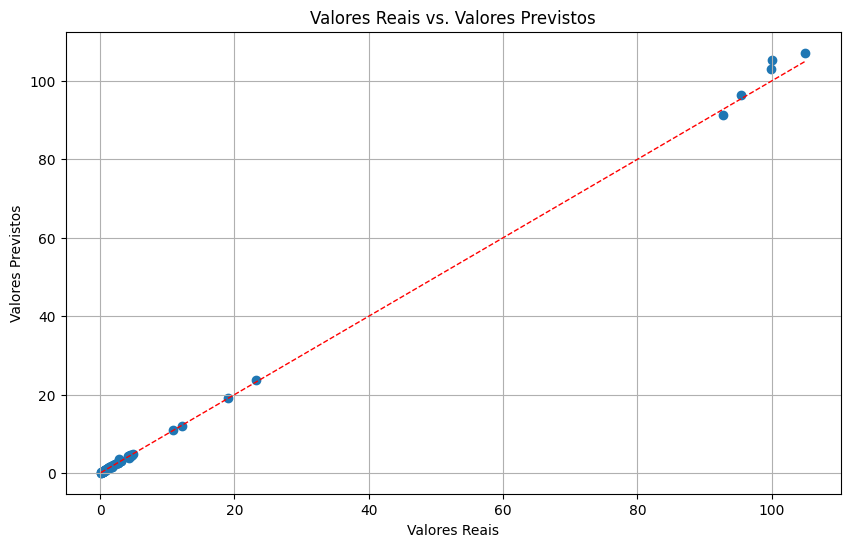

In [ ]:
import matplotlib.pyplot as plt

# Crie um gráfico de dispersão com os valores reais no eixo x e os valores previstos no eixo y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=1)
plt.title('Valores Reais vs. Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.grid(True)

# Adicione a reta de regressão perfeita (y = x) para referência
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=1)

plt.show()